# Problem 9, Chapter 7

In chapter 7, question 9 asks sketching the plot for the $k_{obs}$ of a parallel reaction when the $\Delta S^\ddagger$ and $\Delta H^\ddagger$ have very different values in each of the reactions.

<img src="p9.png" width=800 class=center />

We can just state some values and then see what the plot looks like.

## $k_{obs}$ and the Rate Law

As we have seen, the rate law for for a parallel reaction like the one below...
$$ A \xrightarrow{k_1} B \\
A \xrightarrow{k_2} C$$
is...
$$-\frac{\partial A}{\partial t}  = \left( k_1 + k_2 \right) \cdot A$$

So the observed rate of reaction will be the total of the two rate constants. If each is dependant on a differnt set of $\Delta S^\ddagger$ and $\Delta H^\ddagger$ values then there may be a non-linear dependance on T in the Eyring plot.

## The Erying Plot

Recall transition state theory. The rate constant at a given temperature for a reaction could be calculated from the $\Delta S^\ddagger$ and $\Delta H^\ddagger$ values.

$$ k = \frac{\kappa k_B T}{h} e^\frac{\Delta S^\ddagger}{R}e^\frac{-\Delta H^\ddagger}{RT}$$
where $h$ is the Planck constant, $k_B$ is the Boltzmann constant and $\kappa$ is the transmission coefficient, which is assumed to be $\kappa = 1$.

this can be expressed as a linear equation like so...

$$\ln{\frac{k}{T}} = \frac{-\Delta H^\ddagger}{R} \cdot \frac{1}{T} + \ln{\frac{\kappa k_B}{h}} + \frac{\Delta S^\ddagger}{R}$$

Plotting $\ln{\left( \frac{k}{T} \right)}$ vs. $\frac{1}{T}$ will give a wtraight line with a slope of $\frac{-\Delta H^\ddagger}{R}$ and a y-intercept of $\left( \ln{\frac{\kappa k_B}{h}} + \frac{\Delta S^\ddagger}{R}\right)$. We can obtain values of $\Delta S^\ddagger$ and $\Delta H^\ddagger$ from experimental data. 

## The Plot
In this exercise we will be imagining values and using them to calculate the Erying plot for a parallel reaction. We should choose values so that the two reactions have different slopes in the Erying plot. I plan to just try values until I get a good plot.

One reaction (let us say the $k_1$ reaction) has a negative $\Delta S^\ddagger$ and moderately positive $\Delta H^\ddagger$. The other ($k_2$) has a positive $\Delta S^\ddagger$ and larger positive $\Delta H^\ddagger$.

The code below states these values and the values for the constants. It then calculates the values of $k_1$ and $k_2$ across a range of temperatures and totals them up. Finally the data is converted to the form needed for the Erying plot and plotted.


The data set is below


,temp,k1,k2,kobs
0,200.000000,1.018934e+10,4.099885e+06,1.019344e+10
1,244.444444,1.728858e+10,1.332154e+08,1.742180e+10
2,288.888889,2.564120e+10,1.525419e+09,2.716662e+10
3,333.333333,3.494732e+10,9.307050e+09,4.425437e+10
4,377.777778,4.498635e+10,3.769314e+10,8.267949e+10
5,422.222222,5.559691e+10,1.151381e+11,1.707350e+11
6,466.666667,6.665985e+10,2.871872e+11,3.538470e+11
7,511.111111,7.808605e+10,6.161394e+11,6.942255e+11
8,555.555556,8.980780e+10,1.178083e+12,1.267890e+12
9,600.000000,1.017730e+11,2.058475e+12,2.160248e+12


The data is plotted below


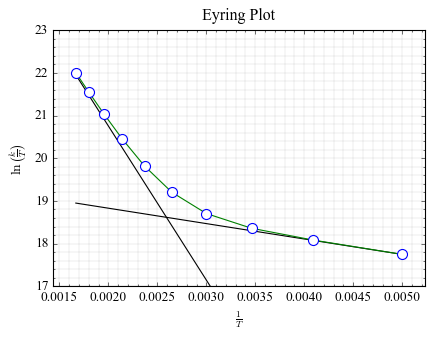

In [3]:
#######################
### import packages ###
#######################

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

path = "https://raw.githubusercontent.com/blinkletter/StealThisBook/main/6_PhysOrgExamples/"


##########################################################
### State values of deltaS and deltaH in each reaction ###
##########################################################

deltaH_1 = 3   # kJ/mole  # we will need to multiply this by 1000
deltaS_1 = -35  # J/(mole•K)

deltaH_2 = 30   # kJ/mole  # we will need to multiply this by 1000
deltaS_2 = 35  # J/(mole•K)

temp_start = 200  # degrees K
temp_end = 600  # degrees K

temp_series = np.linspace(temp_start, temp_end, 10)  # evenly spaced points between the two values
#print(temp_series)

#################################
### State values of constants ###
#################################

###Enter values in a dictionary data structure
constants = {}                        # create empty dictionary
constants["kappa"] = 1                # add a key:value pair to dictionary
constants["k_boltzmann"] = 1.381e-23  # J/K
constants["k_planck"] = 6.626e-34     # J•s
constants["R"] = 8.314                # J/(mole•K)
#print(constants)

#############################################
### Define a function for Erying equation ###
#############################################

def Erying(T, constants, deltaH, deltaS):
    """
    calculates rates according to Erying eqn.
    
    T can be float or np.array
    constants is a dictionary of values
    deltaH is in units of kJ/mole
    deltaS is in units of J/(mole•K)
    returns rate constant with time units in seconds
    """
    ### Extract constants from dictionary for ease of use
    kappa       = constants["kappa"]
    k_boltzmann = constants["k_boltzmann"]
    k_planck    = constants["k_planck"]
    R           = constants["R"]

    deltaH = deltaH * 1000  # convert kJ to J
    
    ### Calculate value of k
    k = (T * kappa * k_boltzmann / k_planck) * np.exp(deltaS / R) * np.exp(-deltaH / (R * T))
    return k


##################################################
### Calculate rate series for both reactions   ###
##################################################

k1 = Erying(temp_series, constants, deltaH_1, deltaS_1)
k2 = Erying(temp_series, constants, deltaH_2, deltaS_2)

kobs = k1 + k2
#print(kobs)

### For presenting the data table, I will create a dictionary of 
### the data series and then convert that dictionary to a
### dataframe (this is not necessary but will allow me to use
### the tools in Pandas to manipulate the data)
result = {}
result["temp"] = temp_series
result["k1"] = k1
result["k2"] = k2
result["kobs"] = kobs
df = pd.DataFrame(result)
print("The data set is below")
display(df)


########################
### Plot Eyring plot ###
########################

plt.style.use(path + "S2_classic2.mplstyle")                    # This stylesheet must be in same folder as this notebook      
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6,4))  # setup figure and plot (ax) within figure
ax.margins(x=.07, y=.07, tight=True)                     # add 7% empty space around outside of plot area   
ax.set(title="Eyring Plot",       
          ylabel=r"$\ln{\left(\frac{k}{T} \right)}$", 
          xlabel=r"$\frac{1}{T}$",                
#          xlim=[0,100],                  
           ylim=[17,23]
         )

x = 1/df["temp"]
k = df["kobs"]
y_obs  = np.log(df["kobs"]/df["temp"])
y1 = np.log(df["k1"]/df["temp"])
y2 = np.log(df["k2"]/df["temp"])

ax.plot(x,y1, "k-")
ax.plot(x,y2, "k-")
ax.plot(x,y_obs, "g-o")


print("The data is plotted below")
#fig.savefig("plot.pdf")   # use this to save the figure in PDF format
plt.show()                 # output the combined plot

## Observations

I finally found values where the two lines had differnt slopes and crossed on the plot. The y-axis is a log scale, so the higher line is tens, thousands and tens of thousands times faster than the lower line. the faster reaction dominates the plot on the log scale and defines the majority of the value of $k_{obs}$. The $k_1$ and $k_2$ parallel reactions exchange places as the fastest reaction, depending on the temperature.

The above plot shows the Eyring plots for both the $k_1$ and $k_2$ parallel reactions as well as the total rate of the reaction. the Erying plot will track with the fastest reaction and, if that changes, we will see the curve for $k_{obs}$.

How could you get the values of $k_1$ and $k_2$? You might choose to do a high temperature experiment where $k_2$ dominates (the left-hand side of the plot) and a low temperature experiment where $k_1$ dominates (the right-hand side of the plot). Or you could define a function for $k_{obs}$ and curve fit it using the tools of *SciPy* to get both parameters from the same data set.